In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 계층적 군집
#### <img src='img/hierarchy.png' width='75%'>
* 군집트리, 덴드로그램을 생성하여 다양한 데이터를 그룹화
* 비슷한 군집끼리 묶어 가면서 최종적으로 하나의 군집단으로 묶는 기법
    + 즉, 군집간의 거리를 기반으로 군집화하는 방식으로
    + 기존의 군집기법(kmeans)에 비해 군집수를 지정x
* 계층적 군집의 종류
    + 응집형bottom-up : 개별데이터 군집 => 군집단 형성
    + 분리형top-down : 데이터 전체를 하나의 군집 => 세부적으로 여러 군집으로 나눔

## 응집형 군집의 예

In [2]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


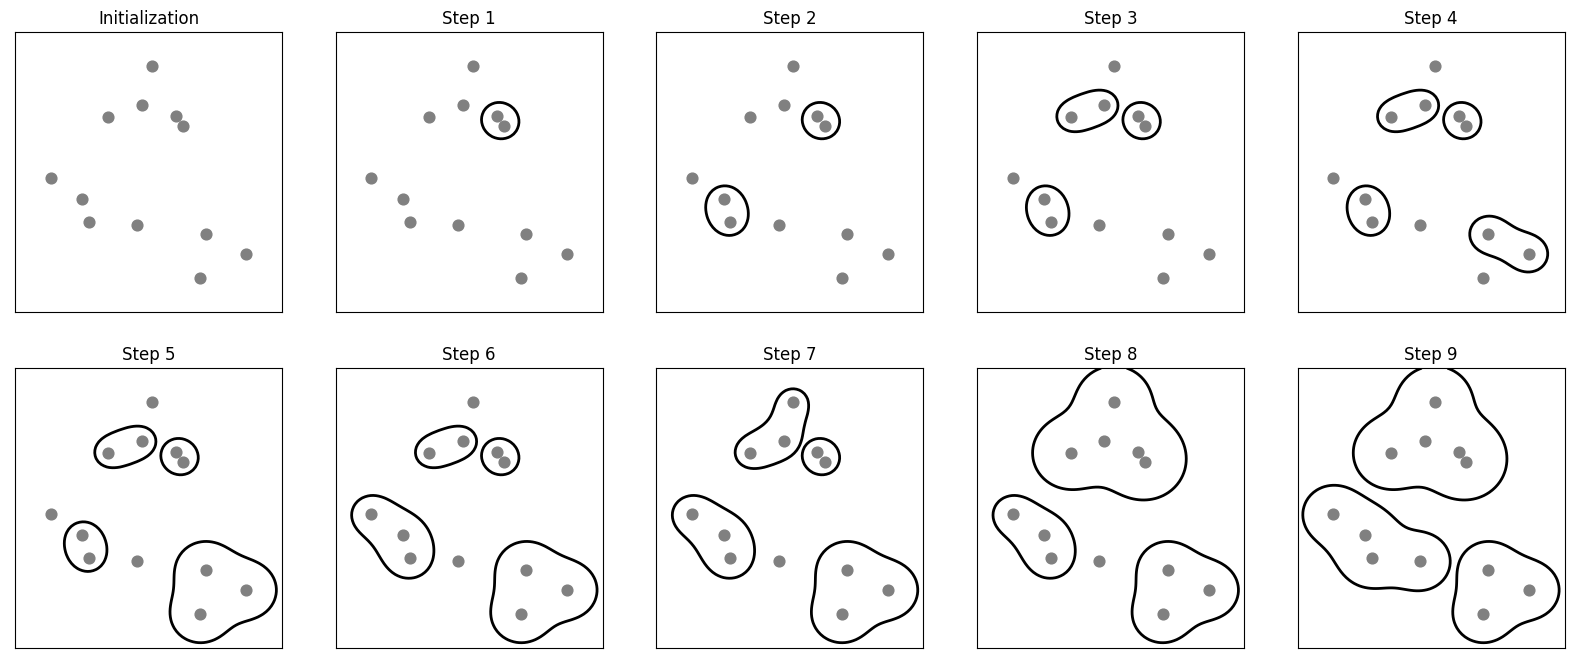

In [5]:
import mglearn

mglearn.plots.plot_agglomerative_algorithm()

## 덴드로그램 시각화
* 각 개체들이 결합되는 순서를 나타내는 트리형태의 다이어그램
##### <img src='img/linkage.png' width='75%'>
##### <img src='img/dendrogram.png' width='75%'>
* linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정
    +  single/average/complete/centeroid/ward
    + 최단연결single    : 각 군집을 대상으로 최소거리 기준 (가까운것부터 군집)
    + 평균연결average   : 각 군집을 대상으로 평균거리 기준
    + 최장연결complete  : 각 군집을 대상으로 최대거리 기준 (먼것부터 군집)
    + 중심연결centeroid : 각 군집내 중심점 기준
    + 와드연결ward      : 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용

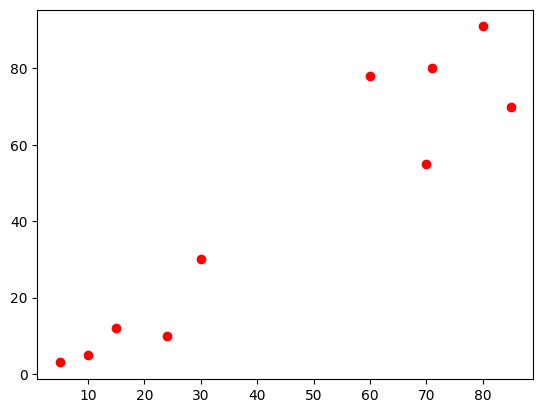

In [7]:
X = np.array([ [5,3], [10,5], [15,12],
               [24,10], [30,30], [85,70],
               [71,80], [60,78], [70,55],
               [80,91] ])
plt.plot(X[:, 0], X[:, 1], 'ro')

In [8]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

# 거리계산방식 지정
linked = linkage(X, method='single')

### 덴드로그램 시각화
+ dendrogram(연결방식, 옵션)

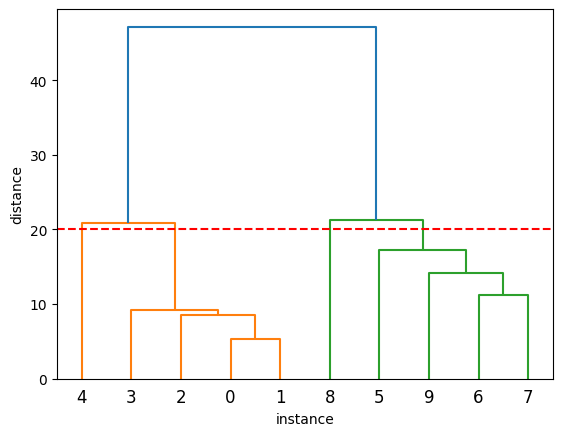

In [10]:
dendrogram(linked, orientation='top')
plt.ylabel('distance')  # 군집간 거리
plt.xlabel('instance')  # 개체
plt.axhline(20,color='red', linestyle='dashed')
plt.show()


## 적절한 군집수 알아보기
* 덴드로그램을 보고 n개의 군집을 나눌려고 할때
  적절한 distance는 어떻게 알아볼까?
* 덴드로그램에서 밑에서 위로 올라갈수록
  군집을 의미하는 선의 갯수가 줄어둠 (응집형 군집!)
* scipy에서는 fcluster함수를 이용해서
  distance가 특정값일때 군집정보를 알려줌
     + fcluster(연결방식, 거리, 거리측정방식)

In [12]:
# 군집간 거리가 20일때 군집의 수는?
clusters = fcluster(linked,20,criterion='distance')
clusters

array([1, 1, 1, 1, 2, 3, 3, 3, 4, 3], dtype=int32)

In [14]:
# unique : 중복값 제외하고 한번만 카운트하는 함수
np.count_nonzero(np.unique(clusters))

4

### iris를 이용한 계층형 군집 분석

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

In [49]:
# 거리계산방식 지정
# linked = linkage(data, method='single')
# linked = linkage(data, method='complete')
# linked = linkage(data, method='average')
linked = linkage(data, method='ward')
# linked = linkage(data, method='centroid')

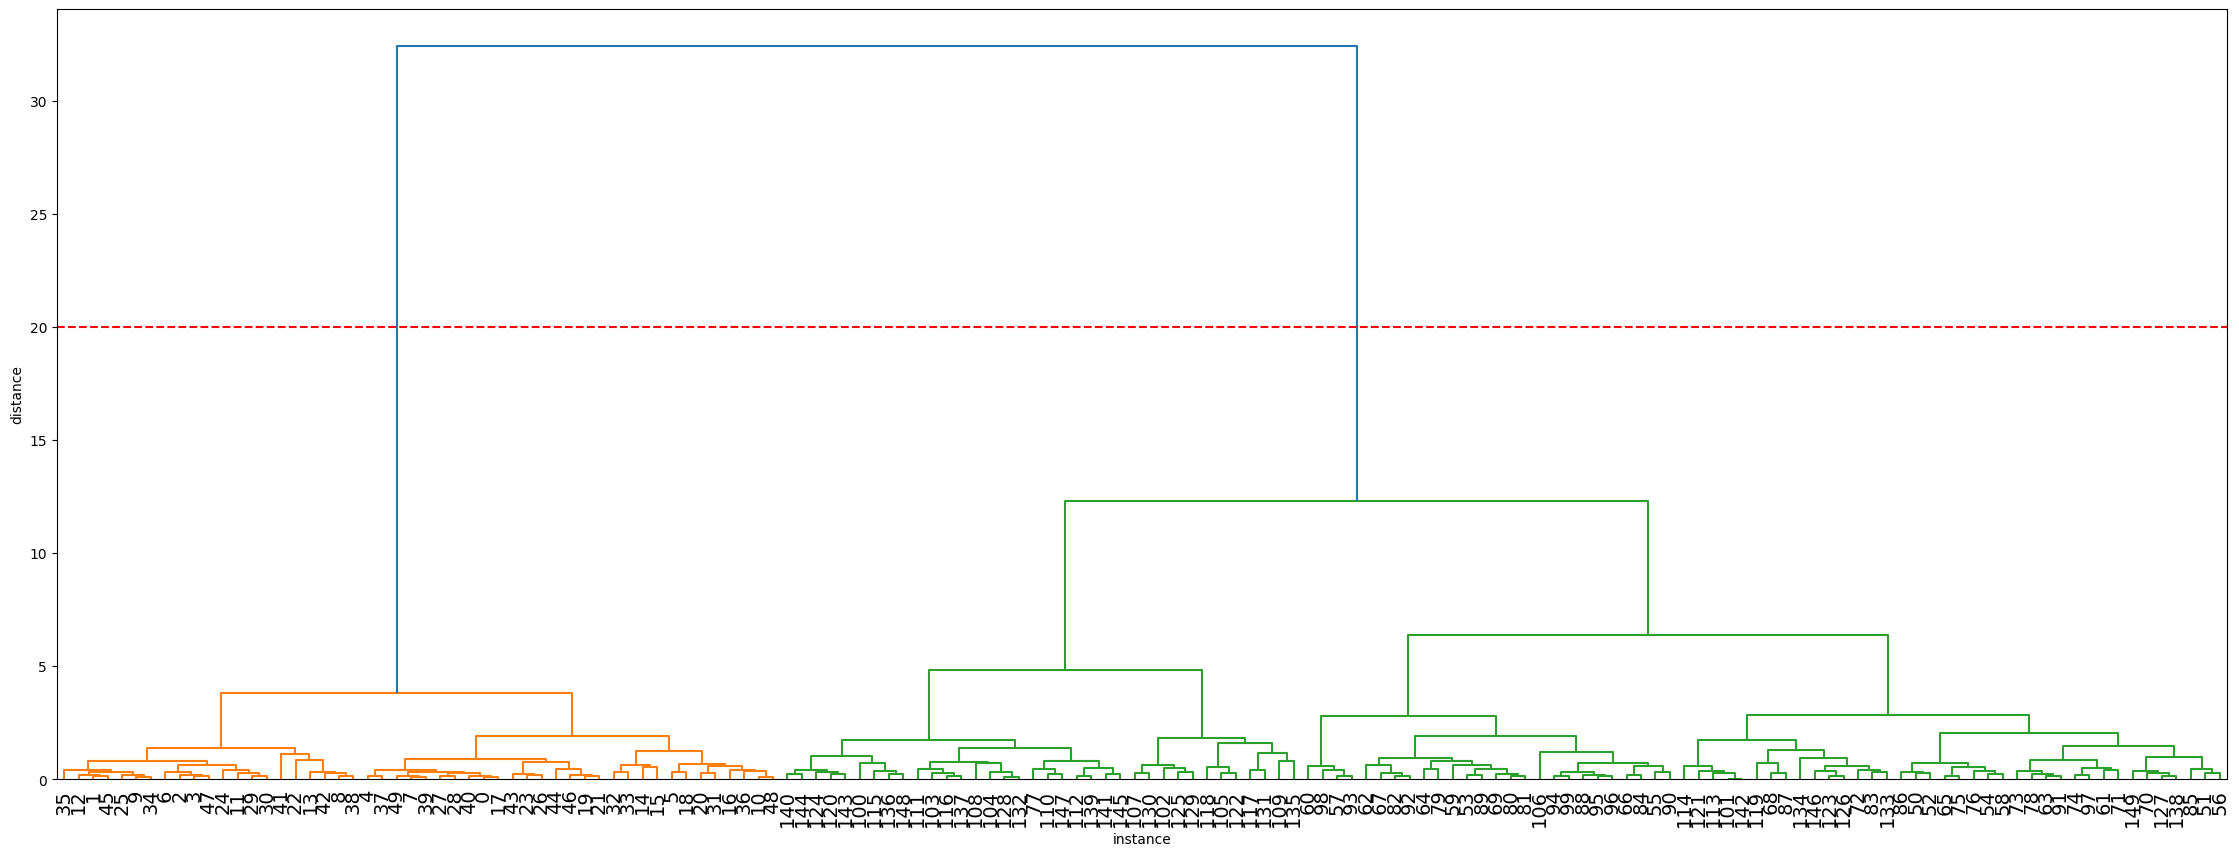

In [50]:
plt.figure(figsize=(28,10))
dendrogram(linked, orientation='top', leaf_font_size=14)
plt.ylabel('distance')  # 군집간 거리
plt.xlabel('instance')  # 개체
plt.axhline(20,color='red', linestyle='dashed')
plt.show()

In [63]:
# 군집간 거리측정방식을 ward로 했을때 3개의 군집으로 나눌경우
# 군집간 거리는?
cls = fcluster(linked,12,criterion='distance')
cls

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [64]:
np.count_nonzero(np.unique(cls))

3

### iris를 이용한 응집형 군집 분석
+ AgglomerativeClustering(군집수, 거리측정방식, 연결방식)

In [66]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',linkage='ward')
groups.fit(data)

AgglomerativeClustering(n_clusters=3)

In [68]:
# 군집 결과 확인
groups.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [70]:
# 실루엣 계수 확인
from sklearn.metrics import silhouette_score

silhouette_score(data[:, [0,1]],groups.labels_)

0.3576978019804449

In [71]:
silhouette_score(data[:, [2,3]],groups.labels_)

0.6398270745578704

### 실루엣 계수 시각화

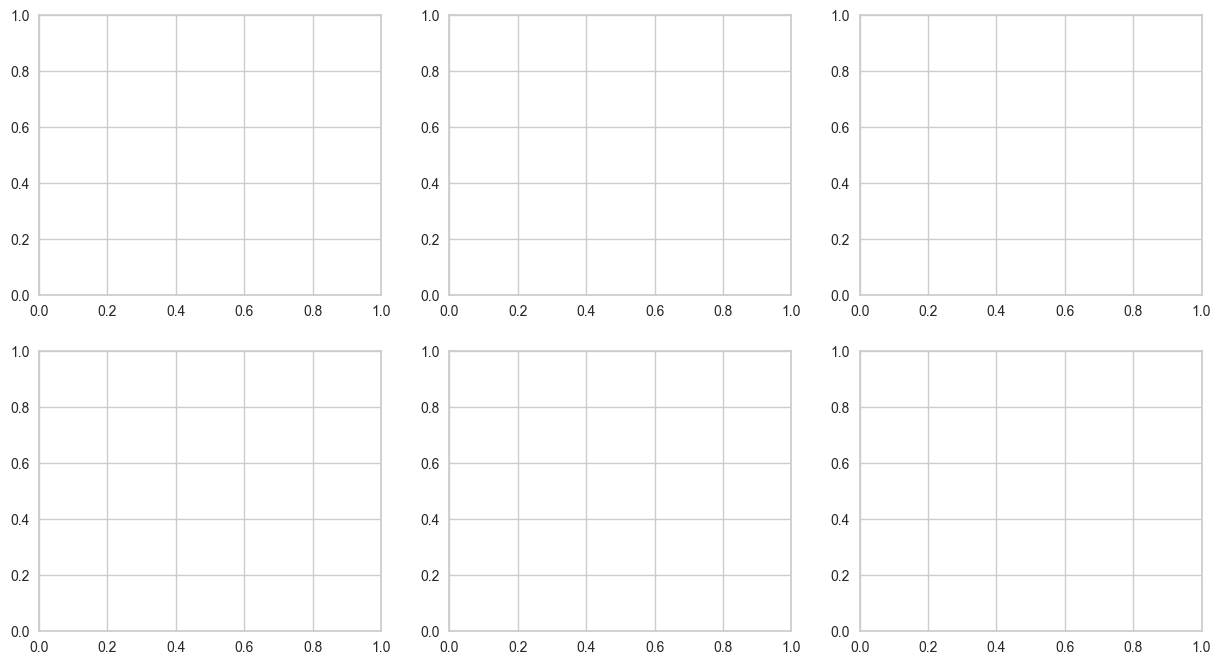

In [76]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    ac = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    q, mod = divmod(k+1, 3)
    visualizer = SilhouetteVisualizer(ac, ax=ax[q-1][mod])
    visualizer.fit_predict(data) 

In [77]:
sss = []
for k in range(2, 10+1):
    ac = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    ac.fit(data)
    
    ss = silhouette_score(data, ac.labels_, metric='euclidean')
    
    sss.append(ss)

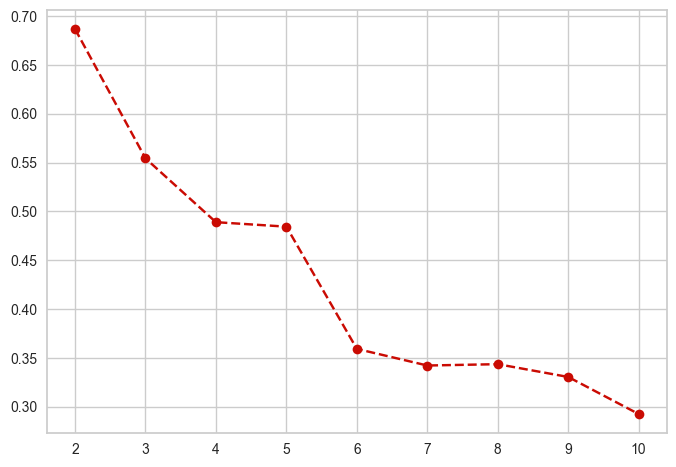

In [78]:
plt.plot(range(2,10+1),sss,'ro--')
plt.show()

In [87]:
from yellowbrick.cluster import KElbowVisualizer

ac = AgglomerativeClustering(affinity='euclidean',linkage='ward')

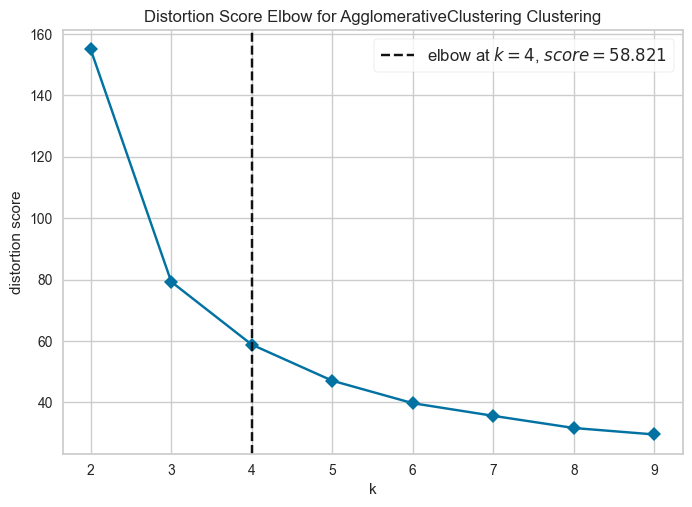

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
visualizer = KElbowVisualizer(ac, k=(2,10), timings = False)
visualizer.fit(data) 
visualizer.show()

In [89]:
ac = AgglomerativeClustering(affinity='euclidean',linkage='ward')

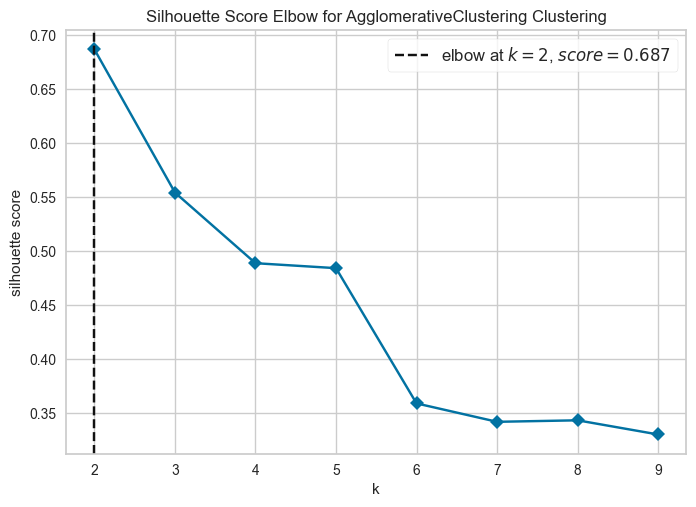

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [90]:
visualizer = KElbowVisualizer(ac, k=(2,10), metric='silhouette',timings = False)
visualizer.fit(data) 
visualizer.show()

## 과일, 채소 구분하기

In [97]:
fresh = pd.read_csv('data/fresh.csv', encoding='euc-kr')
fresh.columns = ['name','sweet','crunch','class']
fresh.head()

,name,sweet,crunch,class
0,포도,8,5,0
1,생선,2,2,1
2,당근,6,10,2
3,오렌지,7,3,0
4,샐러리,3,8,2


In [98]:
data = fresh.iloc[:,[1,2]]

In [102]:
linked = linkage(data, method='single')

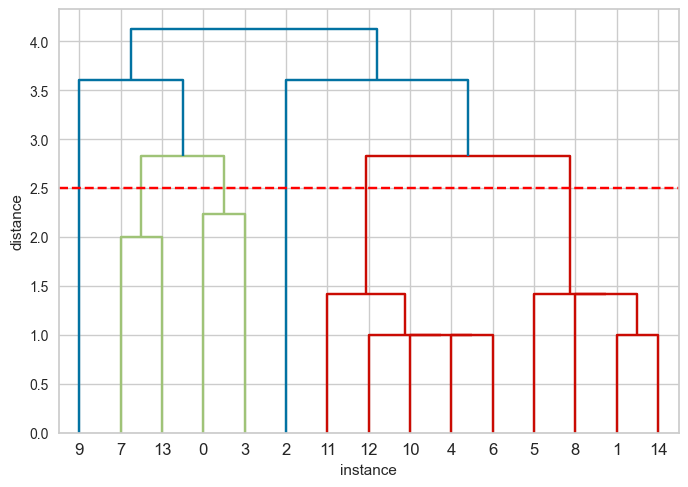

In [107]:
dendrogram(linked, orientation='top')
plt.ylabel('distance')  # 군집간 거리
plt.xlabel('instance')  # 개체
plt.axhline(2.5,color='red', linestyle='dashed')
plt.show()

In [110]:
cls = fcluster(linked,3,criterion='distance')
cls

array([1, 3, 4, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 3], dtype=int32)

In [111]:
np.count_nonzero(np.unique(cls))

4

#### 군집분석

In [112]:
groups = AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',linkage='ward')
groups.fit(data)

AgglomerativeClustering(n_clusters=3)

In [113]:
groups.labels_

array([0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2], dtype=int64)

In [118]:
silhouette_score(data,groups.labels_)

0.465368174935894

In [119]:
sss = []
for k in range(2, 10+1):
    ac = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    ac.fit(data)
    
    ss = silhouette_score(data, ac.labels_, metric='euclidean')
    
    sss.append(ss)

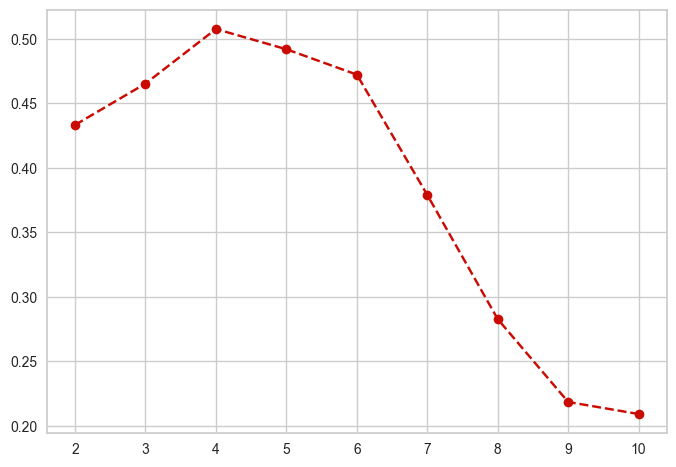

In [120]:
plt.plot(range(2,10+1),sss,'ro--')
plt.show()

In [121]:
ac = AgglomerativeClustering(affinity='euclidean',linkage='ward')

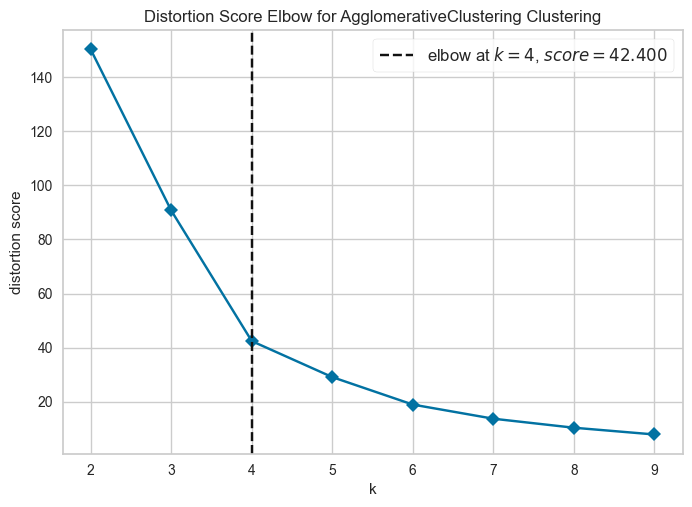

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [122]:
visualizer = KElbowVisualizer(ac, k=(2,10), timings = False)
visualizer.fit(data) 
visualizer.show()

## 농구선수 게임데이터를 이용해서 포지션 예측

In [124]:
bbp = pd.read_csv('data/bbplayer.csv')
bbp.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [131]:
data = bbp.iloc[:,2:]

In [132]:
linked = linkage(data, method='single')

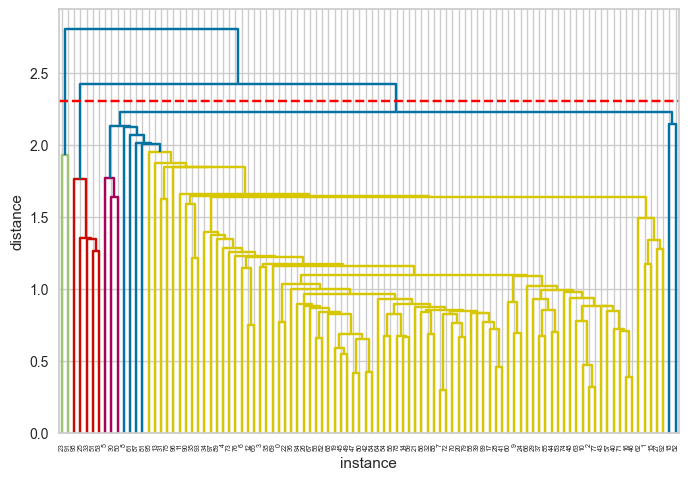

In [135]:
dendrogram(linked, orientation='top')
plt.ylabel('distance')  # 군집간 거리
plt.xlabel('instance')  # 개체
plt.axhline(2.3,color='red', linestyle='dashed')
plt.show()

In [136]:
cls = fcluster(linked,2.3,criterion='distance')
cls

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3], dtype=int32)

In [137]:
np.count_nonzero(np.unique(cls))

3

#### 군집분석

In [138]:
groups = AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',linkage='ward')
groups.fit(data)

AgglomerativeClustering(n_clusters=3)

In [139]:
groups.labels_

array([0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2], dtype=int64)

In [140]:
silhouette_score(data,groups.labels_)

0.33318835198594227

In [141]:
sss = []
for k in range(2, 10+1):
    ac = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    ac.fit(data)
    
    ss = silhouette_score(data, ac.labels_, metric='euclidean')
    
    sss.append(ss)

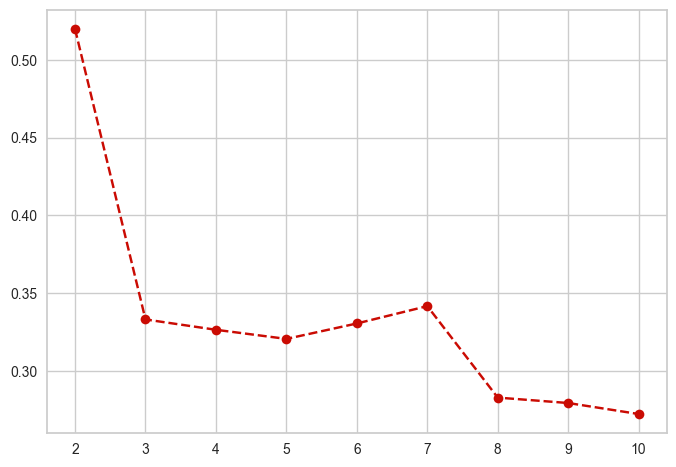

In [143]:
plt.plot(range(2,10+1),sss,'ro--')
plt.show()

In [144]:
ac = AgglomerativeClustering(affinity='euclidean',linkage='ward')

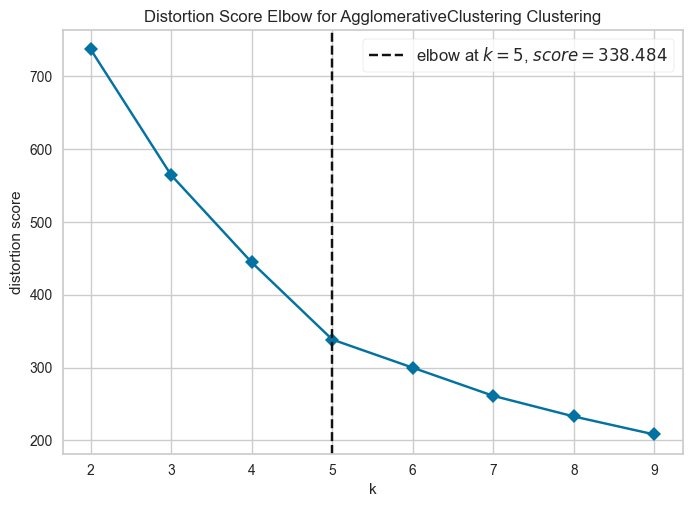

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [145]:
visualizer = KElbowVisualizer(ac, k=(2,10), timings = False)
visualizer.fit(data) 
visualizer.show()